In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import itertools
from Datasets import wind_order_forcings, warm_order_forcings,\
exp_set_dict_wind_order, exp_set_dict_warm_order,\
colors_dict
import Functions_data_analysis as fda
import Functions_plotting as fp

In [3]:
# Use importlib to reload modules after editing them
import importlib
importlib.reload(fp)

<module 'Functions_plotting' from '/glade/campaign/univ/ulnl0002/Gemma/Analysis/Functions_plotting.py'>

In [4]:
loc = 'COT' #COT
tc_temp = 0.5

exp_set_dict = exp_set_dict_wind_order
# sets = ['ic_1995']
sets = ['control','ic_1995','ic_2001','ic_2008']

forcings = wind_order_forcings
# forcings = [2015,1982,1984,2011] #uncomment after testing

# only need to specify n_months if all 5 years are not available. 
# n_months = None # assumes 60 for sens. runs, or all months in control run.
n_months = 60 #needs to be min num of months avail in all runs.

# For tc depths that haven't been calculated yet, whether to save or not
save_new_tcd_arrays = True

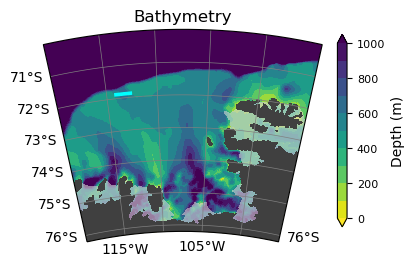

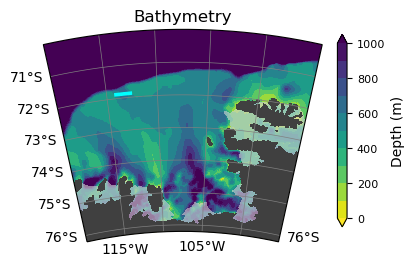

In [5]:
# Show locations of cross sections on bathymetry map
fp.plot_bathymetry_and_locs('AS_near', [loc])
# plt.savefig('Plots/Figure_bathymetry_map_loc...'.png',dpi=600)

In [6]:
# Load precalculated tc depths (or calculate them) and organize for easy plotting
tc_depths = []
times = []
labs = []
tcd_means = []
tcd_stds = []
run_names = []
for set_name in sets:
    print(set_name)
    
    # If tc depths precalculated, load arrays. Otherwise, calculate and save. 
    try:
        set_tcd = np.load('Saved Arrays/tcd_'+str(tc_temp)+'deg_tseries_'+loc+'_'+set_name+'.npy')
        set_times = np.load('Saved Arrays/times_'+set_name+'.npy')
    except:
        print('Calculating tc depths for',set_name)
        set_list = exp_set_dict[set_name]
        set_tcd, set_times = fda.calc_tc_depth_tseries(set_list, loc, tc_temp,n_months = n_months)
        if save_new_tcd_arrays:
            tcd_fname = 'tcd_'+str(tc_temp)+'deg_tseries_'+loc+'_'+set_name+'.npy'
            times_fname = 'times_'+set_name+'.npy' # This will overwrite itself often. Perhaps change to load times from control run.
            np.save('Saved Arrays/'+tcd_fname, set_tcd)
            np.save('Saved Arrays/'+times_fname, set_times)
            print('Saved new tcd and time arrays as:','Saved Arrays/'+tcd_fname)
    print('TDC retrieved with shape:',set_tcd.shape)
    for i in range(len(set_tcd)):
        print(i)
        # print('appending exp tcd with shape',set_tcd[i].shape)
        tc_depths.append(set_tcd[i])
        times.append(set_times)
        if 'control' in set_name:
            labs.append('Control')
            run_name = 'Control'
        else:
            labs.append(str(forcings[i]))
            run_name = set_name+'_'+str(forcings[i])
        run_names.append(run_name)
            
        # Calculate mean of tc depth for each run (set to 0 if contains nans, otherwise makes it looks warmer than it is)
        mean = np.mean(set_tcd[i])
        std = np.std(set_tcd[i])
        if np.isnan(mean):
            tcd_means.append(0)
            tcd_stds.append(0)
            print('Nan mean found in',run_name,':',np.nanmean(set_tcd[i]))
        else:
            tcd_means.append(round(mean,2))
            tcd_stds.append(round(std,2))

control
Calculating tc depths for control
tcd shape is now: (1, 312)
0 calculating tc depth for exp: control
appending tc_depths to exp_tc_depths, which now has shape (1, 312)
Saved new tcd and time arrays as: Saved Arrays/tcd_0.5deg_tseries_COT_control.npy
TDC retrieved with shape: (1, 312)
0
ic_1995
Calculating tc depths for ic_1995
tcd shape is now: (10, 60)
0 calculating tc depth for exp: run_forc_erai_2015_rep_ic_1995
appending tc_depths to exp_tc_depths, which now has shape (10, 60)
1 calculating tc depth for exp: run_forc_erai_1991_rep_ic_1995
appending tc_depths to exp_tc_depths, which now has shape (10, 60)
2 calculating tc depth for exp: run_forc_erai_1982_rep_ic_1995
appending tc_depths to exp_tc_depths, which now has shape (10, 60)
3 calculating tc depth for exp: run_forc_erai_1994_rep_ic_1995
appending tc_depths to exp_tc_depths, which now has shape (10, 60)
4 calculating tc depth for exp: run_forc_erai_1992_rep_ic_1995
appending tc_depths to exp_tc_depths, which now has s

In [7]:
colors_list = [colors_dict[set] for set in sets]
colors = [item for sublist in colors_list for item in sublist]

Control 0 0
ic_1995_2015 -400.84 37.76
ic_1995_1991 -364.18 29.34
ic_1995_1982 -352.81 25.91
ic_1995_1994 0 0
ic_1995_1992 -383.98 29.15
ic_1995_1984 -360.14 28.77
ic_1995_2009 -421.38 59.84
ic_1995_2003 -444.11 66.99
ic_1995_1989 -338.14 18.09
ic_1995_2011 -391.31 35.25
ic_2001_2015 -513.41 37.56
ic_2001_1991 0 0
ic_2001_1982 -477.48 25.18
ic_2001_1994 0 0
ic_2001_1992 -510.84 23.89
ic_2001_1984 -473.44 25.68
ic_2001_2009 0 0
ic_2001_2003 0 0
ic_2001_1989 -452.54 16.11
ic_2001_2011 -506.08 24.79
ic_2008_2015 0 0
ic_2008_1991 0 0
ic_2008_1982 0 0
ic_2008_1994 0 0
ic_2008_1992 0 0
ic_2008_1984 0 0
ic_2008_2009 0 0
ic_2008_2003 0 0
ic_2008_1989 0 0
ic_2008_2011 0 0


KeyError: 'PITT'

<Figure size 640x480 with 0 Axes>

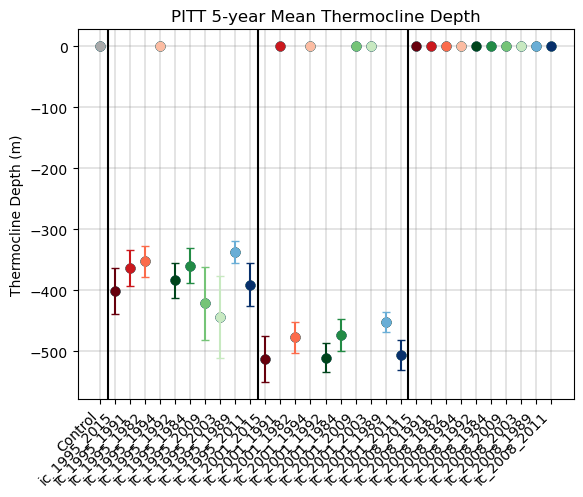

In [8]:
fig = plt.figure()
fig,ax = plt.subplots()
for i in range(len(labs)):
    print(run_names[i],tcd_means[i],tcd_stds[i])
    ax.scatter(run_names,tcd_means)
    ax.errorbar(run_names[i],tcd_means[i], yerr=tcd_stds[i], fmt="o",capsize=3,color=colors[i])
ax.set_xticks(ax.get_xticks(), run_names, rotation=45, ha='right')
plt.axvline(x=0.5,color='k')
plt.axvline(x=10.5,color='k')
plt.axvline(x=20.5,color='k')
plt.ylabel('Thermocline Depth (m)')
plt.grid(color='gray',linewidth=0.3)
plt.title(loc+' 5-year Mean Thermocline Depth')

loc_lims = {'PIG':[-510,-325],'Thwaites':[-655,-380],'Thwaites_East':[-655,-380],\
            'COT':[-400,-190],'EOT':[-420,-200],'MOT':[-520,-300]}
plt.ylim(loc_lims[loc])
fig.set_size_inches((10,3))
plt.tight_layout()
# plt.savefig('Plots/Figure_TC_depth_means_'+loc+'_all_runs.png',dpi=600)

0 Control
1 2015
2 1991
3 1982
4 1994
5 1992
6 1984
7 2009
8 2003
9 1989
10 2011
11 2015
12 1991
13 1982
14 1994
15 1992
16 1984
17 2009
18 2003
19 1989
20 2011
21 2015
22 1991
23 1982
24 1994
25 1992
26 1984
27 2009
28 2003
29 1989
30 2011


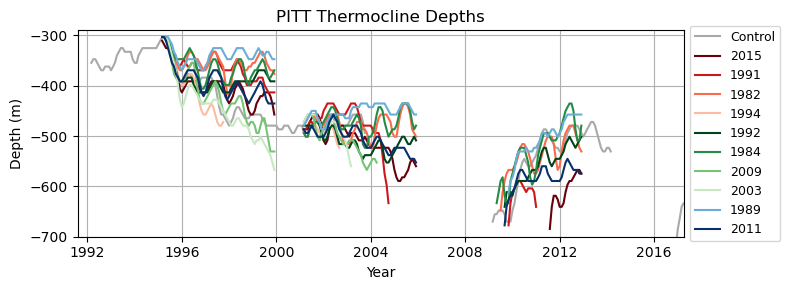

In [12]:
# decide whether to plot all runs (for animating plots in talks)
#plot_labs = labs
# plot_labs = ['Control']
# plot_labs = ['Control','2015']
# plot_labs = ['Control','2015','2011']
plot_labs = labs

# Plot TC depths timeseries
fig = plt.figure()
fig.set_size_inches((8,3))
ax=plt.subplot(1,1,1)

for i in range(len(labs)):
    if labs[i] in plot_labs:
        print(i,labs[i])
        # Calc 3-month running mean to smooth out tseries
        exp_data_rm = pd.Series(tc_depths[i]).rolling(window=3).mean()
        exp_data_rm = exp_data_rm[1:] #shift it so it doesn't start 3 months late
        exp_time_rm = times[i][0:-1]
        if i < 11:
            ax.plot(exp_time_rm, exp_data_rm, label=labs[i], color = colors[i])
        else:
            ax.plot(exp_time_rm, exp_data_rm, color = colors[i])

lims_dict = {'COT':[-450,-160],'EOT':[-450,-160],'PIG':[-590,-290],\
             'Thwaites':[-575,-290],'PITT':[-700,-290]}
ax.set_ylim(lims_dict[loc])
# ax.annotate(loc,xy=(.01, 0.05),xycoords='axes fraction', \
#              fontsize=10,weight='bold')
ax.set_ylabel('Depth (m)')
ax.grid()
ax.set_xlabel('Year')
#ax.set_xlim(np.datetime64('1994-08-01'),np.datetime64('2013-04-01'))
ax.set_xlim(np.datetime64('1991-08-01'),np.datetime64('2017-04-01'))
# ax.set_xticklabels(np.arange(0,20,2))
plt.title(loc+' Thermocline Depths')

ax.legend(ncol=1,fontsize=9,loc='center left',bbox_to_anchor=[1,0.5])

plt.subplots_adjust(top=0.95,bottom=0.06,hspace=0.2,wspace=.25,left=0.08,right=.9)
plt.tight_layout()
# plt.savefig('Plots/Figure_TC_depths_'+loc+'_all_runs.png',dpi=600)

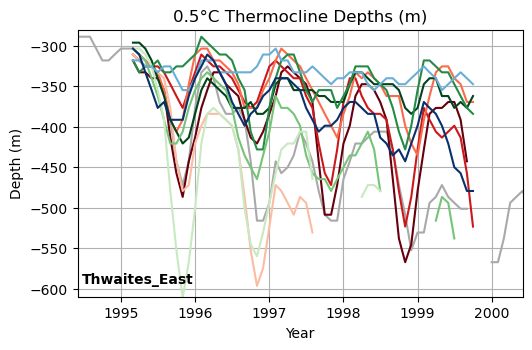

In [24]:
# Zoom in on 1995 experiment set

fig = plt.figure()
fig.set_size_inches((5,3))
ax=plt.subplot(1,1,1)

for i in range(len(labs)):
    
    # Calc 3-month running mean to smooth out tseries
    exp_data_rm = pd.Series(tc_depths[i]).rolling(window=3).mean()
    exp_data_rm = exp_data_rm[1:] #shift it so it doesn't start 3 months late
    exp_time_rm = times[i][0:-1]
    if i < 11:
        ax.plot(exp_time_rm, exp_data_rm, label=labs[i], color = colors[i])
    else:
        ax.plot(exp_time_rm, exp_data_rm, color = colors[i])

if loc == 'COT' or loc == 'EOT':
    ax.set_ylim([-350,-175])
elif loc == 'Thwaites':
    ax.set_ylim([-700,-350])
elif loc == 'Thwaites_East':
    ax.set_ylim([-610,-280])
elif loc == 'PIG':
    ax.set_ylim([-575,-300])
ax.annotate(loc,xy=(.01, 0.05),xycoords='axes fraction', \
             fontsize=10,weight='bold')
ax.set_ylabel('Depth (m)')
ax.grid()
ax.set_xlabel('Year')
ax.set_xlim(np.datetime64('1994-06-01'),np.datetime64('2000-06-01'))

plt.title(str(tc_temp)+'°C Thermocline Depths (m)')

# ax.legend(ncol=1,bbox_to_anchor=[.45,0.2,.8,.4],fontsize=9)

plt.subplots_adjust(top=0.95,bottom=0.06,hspace=0.2,wspace=.25,left=0.08,right=.97)


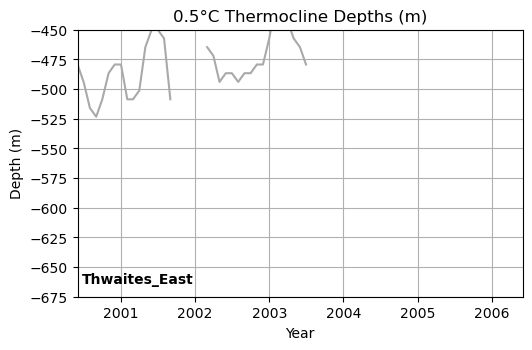

In [19]:
# Zoom in on 2001 experiment set

fig = plt.figure()
fig.set_size_inches((5,3))
ax=plt.subplot(1,1,1)

for i in range(len(labs)):
    
    # Calc 3-month running mean to smooth out tseries
    exp_data_rm = pd.Series(tc_depths[i]).rolling(window=3).mean()
    exp_data_rm = exp_data_rm[1:] #shift it so it doesn't start 3 months late
    exp_time_rm = times[i][0:-1]
    if i < 11:
        ax.plot(exp_time_rm, exp_data_rm, label=labs[i], color = colors[i])
    else:
        ax.plot(exp_time_rm, exp_data_rm, color = colors[i])
if loc == 'COT' or loc == 'EOT':
    ax.set_ylim([-450,-225])
elif loc == 'Thwaites' or loc == 'Thwaites_East':
    ax.set_ylim([-675,-450])
elif loc == 'PIG':
    ax.set_ylim([-600,-400])
ax.annotate(loc,xy=(.01, 0.05),xycoords='axes fraction', \
             fontsize=10,weight='bold')
ax.set_ylabel('Depth (m)')
ax.grid()
ax.set_xlabel('Year')
ax.set_xlim(np.datetime64('2000-06-01'),np.datetime64('2006-06-01'))

plt.title(str(tc_temp)+'°C Thermocline Depths (m)')

# ax.legend(ncol=1,bbox_to_anchor=[.45,0.2,.8,.4],fontsize=9)

plt.subplots_adjust(top=0.95,bottom=0.06,hspace=0.2,wspace=.25,left=0.08,right=.97)
